In [54]:
import pandas as pd
from sqlalchemy import create_engine

import requests
import json
from pprint import pprint

url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GLD&apikey=FCKEHHSIL3S8ZR1U"

#api_key = "FCKEHHSIL3S8ZR1U"

In [55]:
response = requests.get(url)
payload = response.json()

In [56]:
csv_file = "Yahoo_Finance_GLD.csv"
gold_price_df = pd.read_csv(csv_file)
gold_price_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/1/2014,NaN,NaN,NaN,NaN,NaN,NaN
1,9/1/2014,121.970001,122.660004,115.849998,116.209999,116.209999,140533100.0
2,10/1/2014,116.610001,120.500000,111.660004,112.660004,112.660004,155183900.0
3,11/1/2014,112.389999,115.959999,109.669998,112.110001,112.110001,147594200.0
4,12/1/2014,113.800003,118.989998,112.410004,113.580002,113.580002,153722200.0


# Create new data with select columns

In [57]:
new_gold_price_df = gold_price_df[['Date', 'Open', 'High', 'Low', 'Close']].copy()
new_gold_price_df.head()

def reformat_date(date):
    # date -> '8/1/2014'
    split_date = date.split('/') # => ['8', '1', '2014']
    
    # create variables to store the y,m,d
    new_split_date = []
    
    for s in split_date:
        if (len(s) == 1):
            new_split_date.append(f"0{s}")
        else:
            new_split_date.append(s)
             
    new_date_string = f"{new_split_date[2]}-{new_split_date[0]}-{new_split_date[1]}"
    return new_date_string

# convert date column to proper format -> y-m-d
new_gold_price_df['Date'] = new_gold_price_df['Date'].apply(reformat_date)
new_gold_price_df

# extract only the columns that we want
gold_price_compact_df = new_gold_price_df[['Date', 'Close']]
gold_price_compact_df.head()

,Date,Close
0,2014-08-01,NaN
1,2014-09-01,116.209999
2,2014-10-01,112.660004
3,2014-11-01,112.110001
4,2014-12-01,113.580002


## Store JSON data into a DataFrame

In [125]:
import requests
import json

json_file = "monthly_json.json"
gold_json_df = pd.read_json(json_file)
gold_json_df.head()

# convert date column to string
gold_json_df['Date'] = gold_json_df['Date'].astype('str')
gold_json_df.head()

,Date,Price
0,1950-01-01,34.73
1,1950-02-01,34.73
2,1950-03-01,34.73
3,1950-04-01,34.73
4,1950-05-01,34.73


In [59]:
len('12')

2

In [60]:
# Merge the two dfs
pd.merge(left=gold_price_compact_df, right=gold_json_df, on=['Date'])

,Date,Close,Price
0,2014-08-01,NaN,1297.005
1,2014-09-01,116.209999,1241.330
2,2014-10-01,112.660004,1223.565
3,2014-11-01,112.110001,1176.413
4,2014-12-01,113.580002,1200.440
5,2015-01-01,123.449997,1249.333
6,2015-02-01,116.160004,1231.100
7,2015-03-01,113.660004,1180.636
8,2015-04-01,113.470001,1198.253
9,2015-05-01,114.099998,1197.684


In [119]:
merged_df =pd.merge(left=gold_price_compact_df, right=gold_json_df, on=['Date'])

In [120]:
dfObj = pd.DataFrame(merged_df, columns = ['Date', 'Close' , 'Price'])

dfObj['XAU_Conv'] = (dfObj['Price']) * 0.095599

dfObj['XAU-GLD'] = (dfObj['XAU_Conv'] - dfObj['Close'])

In [121]:
def pct_change(dfObj):
    
    dfObj['XAU_Conv_Change'] = 1 * (1 - dfObj.iloc[0].Close / dfObj.Close)

    return dfObj

dfObj.groupby('Date').apply(pct_change).head()

,Date,Close,Price,XAU_Conv,XAU-GLD,XAU_Conv_Change
0,2014-08-01,NaN,1297.005,123.992381,NaN,NaN
1,2014-09-01,116.209999,1241.330,118.669907,2.459908,0.0
2,2014-10-01,112.660004,1223.565,116.971590,4.311586,0.0
3,2014-11-01,112.110001,1176.413,112.463906,0.353905,0.0
4,2014-12-01,113.580002,1200.440,114.760864,1.180862,0.0


In [141]:
dfObj['Close_dn'] = dfObj['Close'].shift(1)
dfObj['Close_Change'] = -(1 - ((dfObj['Close'] / dfObj['Close'].shift(1))))*100

dfObj['XAU_Change_dn'] = dfObj['XAU_Conv'].shift(1)
dfObj['XAU_Change'] = -(1 - dfObj['XAU_Conv'] / dfObj['XAU_Conv'].shift(1))*100

dfObj.head()

,Date,Close,Price,XAU_Conv,XAU-GLD,XAU_Conv_Change_dn,XAU_Conv_Change,Close_dn,Close_Change,XAU_Change_dn,XAU_Change
0,2014-08-01,NaN,1297.005,123.992381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-01,116.209999,1241.330,118.669907,2.459908,123.992381,4.292582,NaN,NaN,123.992381,-4.292582
2,2014-10-01,112.660004,1223.565,116.971590,4.311586,118.669907,1.431126,116.209999,-3.054810,118.669907,-1.431126
3,2014-11-01,112.110001,1176.413,112.463906,0.353905,116.971590,3.853657,112.660004,-0.488197,116.971590,-3.853657
4,2014-12-01,113.580002,1200.440,114.760864,1.180862,112.463906,-2.042395,112.110001,1.311213,112.463906,2.042395


In [94]:
dfObj['XAU_Conv_Change_dn'] = dfObj['Close'].shift(1)
dfObj['XAU_Conv_Change'] = 1 * (1 - dfObj['Close'] / dfObj['Close'].shift(1))
dfObj.head()

,Date,Close,Price,XAU_Conv,XAU-GLD,CLose_dn,XAU_Conv_Change_dn,XAU_Conv_Change
0,2014-08-01,NaN,1297.005,123.992381,NaN,NaN,NaN,NaN
1,2014-09-01,NaN,1241.330,118.669907,2.459908,NaN,NaN,NaN
2,2014-10-01,0.030548,1223.565,116.971590,4.311586,116.209999,NaN,NaN
3,2014-11-01,0.004882,1176.413,112.463906,0.353905,112.660004,0.030548,0.840187
4,2014-12-01,-0.013112,1200.440,114.760864,1.180862,112.110001,0.004882,3.685827


In [126]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pprint
import json
import pymongo
from pymongo import MongoClient


In [127]:
client = MongoClient('mongodb://localhost:27017/')

In [128]:
db = client.GoldDB
print(client.list_database_names())

['ClassDB', 'admin', 'config', 'local', 'travel_db']


In [129]:
# Drop Database if exists
dblist = client.list_database_names()
if "GoldDB" in dblist:
    print("The database exists.") 
    client.drop_database('GoldDB')
else:
    print("Database Does not exist")

Database Does not exist


In [130]:
# Define the 'goldDB' database in Mongo
db = client["GoldDB"]
print(client.list_database_names())

['ClassDB', 'admin', 'config', 'local', 'travel_db']


In [131]:
# Create Collections 
Gold_Data_Collection = db["Gold_Data"]
Stock_GLD_Data_Collection = db["Stock_GLD_Data"]
Gold_Reporting_Data_Collection = db["Gold_Reporting_Data"]

print(db.list_collection_names())

[]


In [132]:
# Prepare Data to Load the Gold_Price_Data
Gold_Price_Data = json.loads(gold_json_df.to_json(orient='records'))
#Gold_Price_Data

# Insert Documents in "Gold_Data_Collection" collection
x = Gold_Data_Collection.insert_many(Gold_Price_Data)
print(x)

In [133]:
# Prepare Data to Load the Stock_GLD_Data
Stock_GLD_Data = json.loads(gold_price_compact_df.to_json(orient='records'))
#Gold_Price_Data

# Insert Documents in "Gold_Data_Collection" collection
x1 = Stock_GLD_Data_Collection.insert_many(Stock_GLD_Data)
print(x1)

In [134]:
print(db.list_collection_names())

['Gold_Data', 'Stock_GLD_Data']


In [135]:
Gold_Data = db.Gold_Data.find()

# Iterate through each student in the collection
for row in Gold_Data:
    pprint.pprint(row)
    

{'Date': '1950-01-01',
 'Price': 34.73,
 '_id': ObjectId('5d4ef9dd411825ad6ebdefe0')}
{'Date': '1950-02-01',
 'Price': 34.73,
 '_id': ObjectId('5d4ef9dd411825ad6ebdefe1')}
{'Date': '1950-03-01',
 'Price': 34.73,
 '_id': ObjectId('5d4ef9dd411825ad6ebdefe2')}
{'Date': '1950-04-01',
 'Price': 34.73,
 '_id': ObjectId('5d4ef9dd411825ad6ebdefe3')}
{'Date': '1950-05-01',
 'Price': 34.73,
 '_id': ObjectId('5d4ef9dd411825ad6ebdefe4')}
{'Date': '1950-06-01',
 'Price': 34.73,
 '_id': ObjectId('5d4ef9dd411825ad6ebdefe5')}
{'Date': '1950-07-01',
 'Price': 34.73,
 '_id': ObjectId('5d4ef9dd411825ad6ebdefe6')}
{'Date': '1950-08-01',
 'Price': 34.73,
 '_id': ObjectId('5d4ef9dd411825ad6ebdefe7')}
{'Date': '1950-09-01',
 'Price': 34.73,
 '_id': ObjectId('5d4ef9dd411825ad6ebdefe8')}
{'Date': '1950-10-01',
 'Price': 34.73,
 '_id': ObjectId('5d4ef9dd411825ad6ebdefe9')}
{'Date': '1950-11-01',
 'Price': 34.73,
 '_id': ObjectId('5d4ef9dd411825ad6ebdefea')}
{'Date': '1950-12-01',
 'Price': 34.72,
 '_id': Object

{'Date': '1958-06-01',
 'Price': 35.1,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf045')}
{'Date': '1958-07-01',
 'Price': 35.11,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf046')}
{'Date': '1958-08-01',
 'Price': 35.1,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf047')}
{'Date': '1958-09-01',
 'Price': 35.1,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf048')}
{'Date': '1958-10-01',
 'Price': 35.11,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf049')}
{'Date': '1958-11-01',
 'Price': 35.1,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf04a')}
{'Date': '1958-12-01',
 'Price': 35.09,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf04b')}
{'Date': '1959-01-01',
 'Price': 35.07,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf04c')}
{'Date': '1959-02-01',
 'Price': 35.06,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf04d')}
{'Date': '1959-03-01',
 'Price': 35.06,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf04e')}
{'Date': '1959-04-01',
 'Price': 35.08,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf04f')}
{'Date': '1959-05-01',
 'Price': 35.12,
 '_id': ObjectId('

 'Price': 106.225,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf0fb')}
{'Date': '1973-09-01',
 'Price': 103.034,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf0fc')}
{'Date': '1973-10-01',
 'Price': 99.923,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf0fd')}
{'Date': '1973-11-01',
 'Price': 94.645,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf0fe')}
{'Date': '1973-12-01',
 'Price': 106.236,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf0ff')}
{'Date': '1974-01-01',
 'Price': 129.027,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf100')}
{'Date': '1974-02-01',
 'Price': 150.0,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf101')}
{'Date': '1974-03-01',
 'Price': 168.298,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf102')}
{'Date': '1974-04-01',
 'Price': 172.243,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf103')}
{'Date': '1974-05-01',
 'Price': 163.568,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf104')}
{'Date': '1974-06-01',
 'Price': 154.013,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf105')}
{'Date': '1974-07-01',
 'Price': 142.283,
 '_id': ObjectId(

{'Date': '2009-05-01',
 'Price': 926.855,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf2a8')}
{'Date': '2009-06-01',
 'Price': 947.807,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf2a9')}
{'Date': '2009-07-01',
 'Price': 934.272,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf2aa')}
{'Date': '2009-08-01',
 'Price': 949.5,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf2ab')}
{'Date': '2009-09-01',
 'Price': 996.443,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf2ac')}
{'Date': '2009-10-01',
 'Price': 1043.511,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf2ad')}
{'Date': '2009-11-01',
 'Price': 1126.119,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf2ae')}
{'Date': '2009-12-01',
 'Price': 1135.012,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf2af')}
{'Date': '2010-01-01',
 'Price': 1119.575,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf2b0')}
{'Date': '2010-02-01',
 'Price': 1095.8,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf2b1')}
{'Date': '2010-03-01',
 'Price': 1115.554,
 '_id': ObjectId('5d4ef9dd411825ad6ebdf2b2')}
{'Date': '2010-04-01',
 'Price

In [136]:
Stock_GLD_Data = db.Stock_GLD_Data.find()

# Iterate through each student in the collection
for stock in Stock_GLD_Data:
    pprint.pprint(stock)

{'Close': None,
 'Date': '2014-08-01',
 '_id': ObjectId('5d4efa2e411825ad6ebdf323')}
{'Close': 116.209999,
 'Date': '2014-09-01',
 '_id': ObjectId('5d4efa2e411825ad6ebdf324')}
{'Close': 112.660004,
 'Date': '2014-10-01',
 '_id': ObjectId('5d4efa2e411825ad6ebdf325')}
{'Close': 112.110001,
 'Date': '2014-11-01',
 '_id': ObjectId('5d4efa2e411825ad6ebdf326')}
{'Close': 113.580002,
 'Date': '2014-12-01',
 '_id': ObjectId('5d4efa2e411825ad6ebdf327')}
{'Close': 123.449997,
 'Date': '2015-01-01',
 '_id': ObjectId('5d4efa2e411825ad6ebdf328')}
{'Close': 116.160004,
 'Date': '2015-02-01',
 '_id': ObjectId('5d4efa2e411825ad6ebdf329')}
{'Close': 113.660004,
 'Date': '2015-03-01',
 '_id': ObjectId('5d4efa2e411825ad6ebdf32a')}
{'Close': 113.470001,
 'Date': '2015-04-01',
 '_id': ObjectId('5d4efa2e411825ad6ebdf32b')}
{'Close': 114.099998,
 'Date': '2015-05-01',
 '_id': ObjectId('5d4efa2e411825ad6ebdf32c')}
{'Close': 112.370003,
 'Date': '2015-06-01',
 '_id': ObjectId('5d4efa2e411825ad6ebdf32d')}
{'Clo

# Compare Gold Stock (GLD) against Gold Price

No handles with labels found to put in legend.


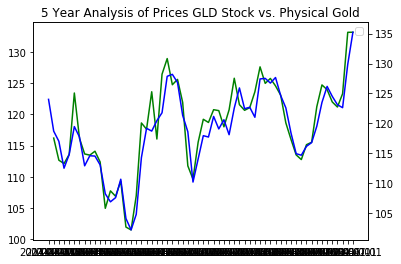

In [149]:
#Plot Close Price  (G) vs. Cost of Physical Gold (B)
ig, ax1 = plt.subplots()

x = dfObj['Date']
y1 = dfObj['Close']
y2 = dfObj['XAU_Conv']
plt.title('5 Year Analysis of Prices GLD Stock vs. Physical Gold')
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

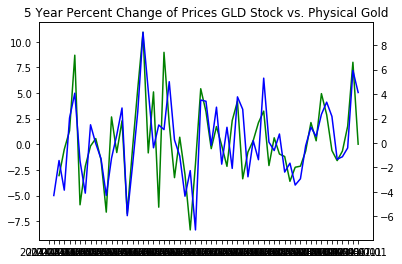

In [147]:
#Plot Close Price PctChng  (G) vs. Cost of Physical Gold PctChng (B)
ig, ax1 = plt.subplots()

x = dfObj['Date']
y1 = dfObj['Close_Change']
y2 = dfObj['XAU_Change']
ax2 = ax1.twinx()

plt.title('5 Year Percent Change of Prices GLD Stock vs. Physical Gold')

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

In [ ]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()